In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


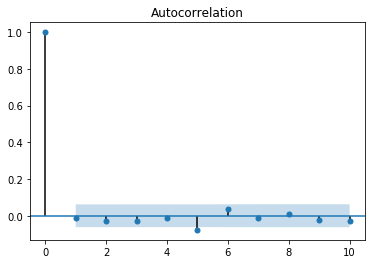

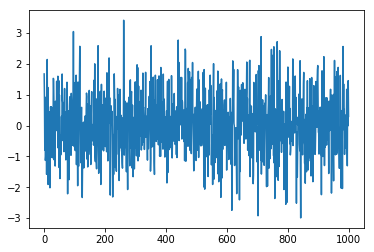

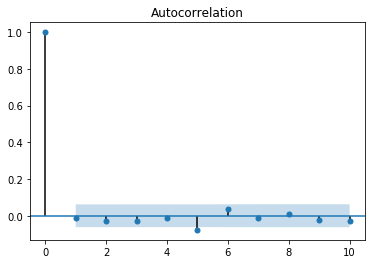

In [9]:
#WHITE NOISE PROCESS - SHOWS NO AUTOCORRELATIONS
N=1000
#sigma=1
ts=np.random.randn(1000)

plt.plot(ts)
tsaplots.plot_acf(ts, lags=10)


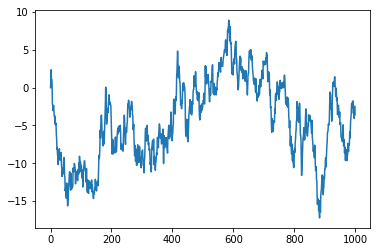

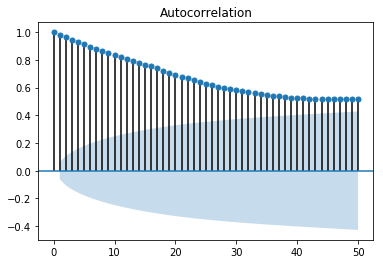

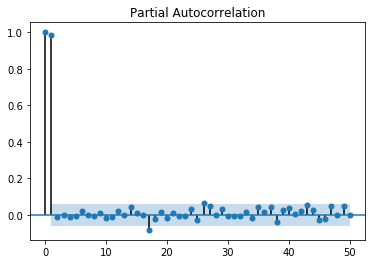

In [6]:
# NEXT TRY A RANDOM WALK THAT
N=1000
z=np.random.randn(N)
x=np.zeros(N)
#we start with x_0=0
for i in np.arange(1,N,1):
    x[i] = x[i-1]+z[i]
plt.plot(x)
tsaplots.plot_acf(x, lags=50);
tsaplots.plot_pacf(x, lags=50);

Non-Stationary Process. Integrated. Shows clearly that the process can go anywhere from starting position. Also variance is function of Time.
        Another thing, Autocorrelations do not go down in any REASONABLE AMOUNT OF TIME. An AR(1) process also shows autocorrelations but is stationary. There we can see that Autocorrelations go down with the Persistence parameter in time exponentially.!!
Also PACF shows Integration of Order 1!!!!

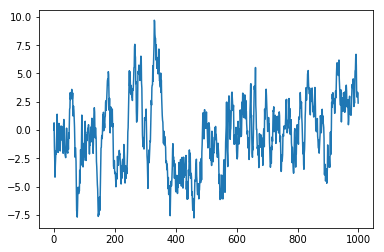

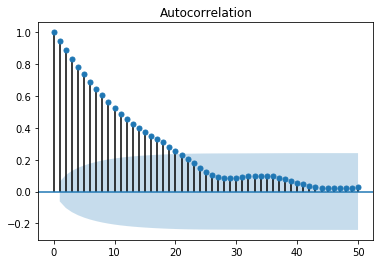

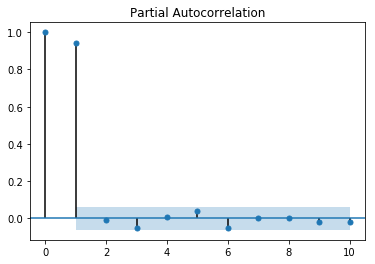

In [8]:
# NEXT TRY AR 1
N=1000
z=np.random.randn(N)
x=np.zeros(N)
#we start with x_0=0
for i in np.arange(1,N,1):
    x[i] = 0.95*x[i-1]+z[i]
plt.plot(x)
tsaplots.plot_acf(x, lags=50);
tsaplots.plot_pacf(x, lags=10);

Can see that this Process is Absolutely different from previous one. Shows Persistence, clustering etc... and the Autocorrelations are coming down!!
Interesting that it still shows the $R_1$!! Which is essentially the coefficient of $X_t-1$

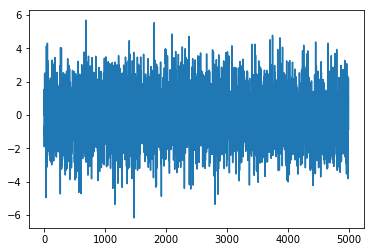

In [10]:
# Write a General AR1 model - Source: http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html

def ts_gen_ar1(size, sigma, alpha1):
    e=sigma*np.random.randn(size)
    x=np.zeros(size)
    for i in np.arange(1,size,1):
        x[i] = alpha1*x[i-1] + e[i]
    #print x
    return x

ts1 = ts_gen_ar1(5000, 1.5, 0.3)
plt.plot(ts1);


this is almost like white noise.. Shows the difference the Persistence parameter makes!!

The partial autocorrelation cpefficients tell us the order of the AR(p) models and their values. 
These can basically be inferred from the ACFs by solving a system of linear equations (YULE WALKER!). Think - we have the Regression (Model AR equation). Then multiply by $X_{t-k}$ and take expectations!



MA processes are very prevalent in econometrics, and are used to model economic indicators affected by random events such as strikes, shortages and so on. A MA(1) process represents 2 such random shocks, one now and one in the past. For a set of products in a grocery store, the number of active coupon campaigns introduced at different times would constitute multiple 'shocks' that affect the prices of the products in question.

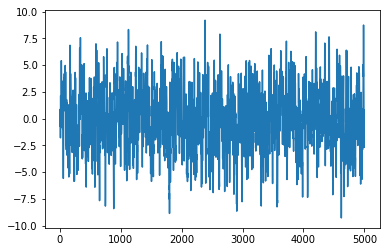

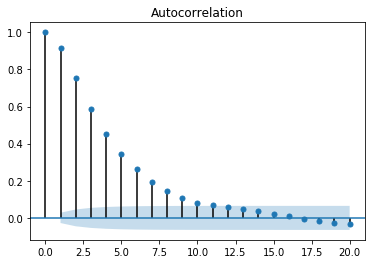

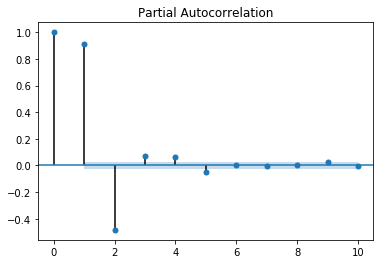

In [14]:
# Generate ARMA samples....
arparams = [1, -0.9, 0.08]
maparams = [1, 0.5, 0.2]
samps=sm.tsa.arma_generate_sample(arparams, maparams, 5000)
plt.plot(samps);
tsaplots.plot_acf(samps, lags=20);
tsaplots.plot_pacf(samps, lags=10);

Now Fit the Samples to an ARMA process. The plot the fitted values as well as the PACF and ACF to see how close it gets

In [28]:
ArmaResult = sm.tsa.ARMA(samps, (2,2)).fit()

C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


[ 0.94381891 -0.13405636]
[0.44706475 0.20666065]
14182.862448815446


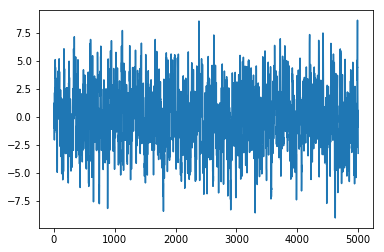

In [26]:
print (ArmaResult.arparams)
print (ArmaResult.maparams)
print (ArmaResult.model)
print (ArmaResult.aic)
plt.plot(ArmaResult.fittedvalues)

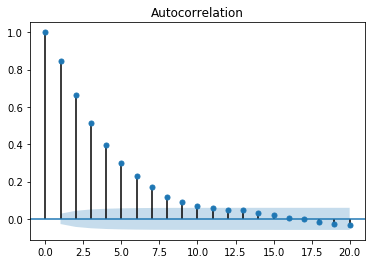

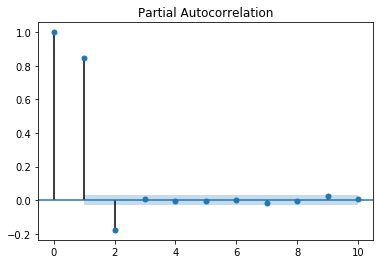

In [27]:
tsaplots.plot_acf(ArmaResult.fittedvalues, lags=20);
tsaplots.plot_pacf(ArmaResult.fittedvalues, lags=10);

Try and Fit the Model to an ARMA 2,1 Model to see if that produces a better AIC

In [32]:
ArmaResult21 = sm.tsa.ARMA(samps, (2,1)).fit()
print (ArmaResult21.aic)

C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


14219.24534605251


Results show that the 2,2 Model is a better fit as the AIC is smaller

In [34]:
import os
os.getcwd()

'C:\\Users\\Akhil'

In [35]:
path="C:\\Users\Akhil\Documents\Econometrics"
os.chdir(path)

In [124]:
df=pd.read_csv("./AUSCPIALLQINMEI.csv")


In [125]:
df.DATE = pd.to_datetime(df.DATE)
ddf = df[(df.DATE> '1971') & (df.DATE < '1990')]

In [57]:
ddf.set_index(ddf.DATE, inplace = True)

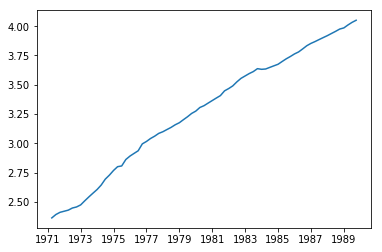

In [58]:
logcpi = np.log(ddf.VALUE)
plt.plot(logcpi)

This is Clearly not a Stationary Series as we see a Trend.. 

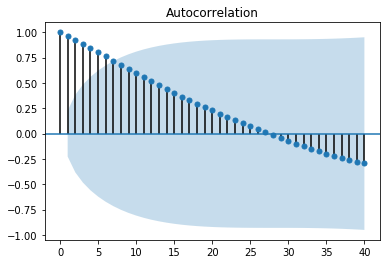

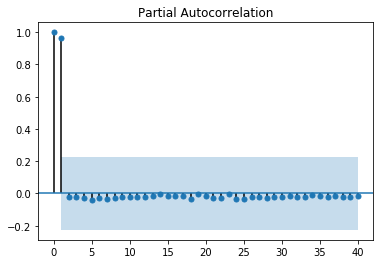

In [59]:
tsaplots.plot_acf(logcpi, lags=40);
tsaplots.plot_pacf(logcpi, lags=40);

ACF shows auto regressive model... Atleast of Order 1 frm the PACF

In [64]:
ADF1 = sm.tsa.adfuller(logcpi, regression = 'ct')  #Add a Linear trend to the regression as this is Clearly visible
pValue1 = ADF1[1]
print (pValue1)

0.9886909661126604


Advance Dickey Fuller Test for unit root. Strongly shows the presence of Unit root as H0 is not rejected. 
Now difference the series

In [62]:
logcpidiff = logcpi.diff().dropna()
logcpidiff.head()

DATE
1971-07-01    0.028988
1971-10-01    0.018868
1972-01-01    0.009302
1972-04-01    0.009217
1972-07-01    0.018182
Name: VALUE, dtype: float64

0.041662445654701195


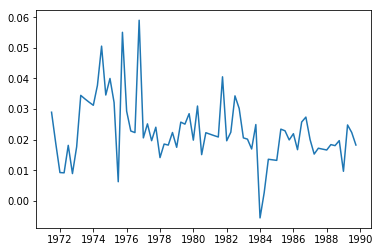

In [63]:
ADF0 = sm.tsa.adfuller(logcpidiff)
pvalue0 = ADF0[1]
print (pvalue0)
plt.plot(logcpidiff)

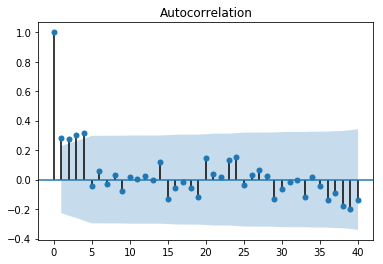

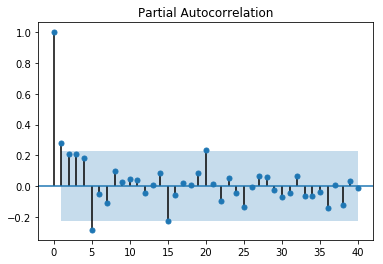

In [67]:
tsaplots.plot_acf(logcpidiff, lags=40);
tsaplots.plot_pacf(logcpidiff, lags=40);

Autocorrelations have gone down now.So we try and fit an AR 2 and AR 1 model both and compare the AIC criterions

In [71]:
model = sm.tsa.ARIMA(logcpi, order=(2,1,0))
fit = model.fit(method="mle")
fit.summary()

C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.VALUE   No. Observations:                   74
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 237.099
Method:                           mle   S.D. of innovations              0.010
Date:                Wed, 24 Apr 2019   AIC                           -466.199
Time:                        13:13:34   BIC                           -456.983
Sample:                    07-01-1971   HQIC                          -462.522
                         - 10-01-1989                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0228      0.002     11.601      0.000       0.019       0.027
ar.L1.D.VALUE     0.2206      0.113      1.953      0.055      -0.001       0.442
ar.L2.D.VALUE     0.2079      0.113      1.846      0.069      -0.013       0.429
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7258           +0.0000j            1.7258            0.0000
AR.2           -2.7867           +0.0000j            2.7867            0.5000
-----------------------------------------------------------------------------
"""

Both Coefficients are just below significance. Hence try AR1 model to see if that makes better fit..

The coeffficient is much more significant now! the AIC is lesser than AR 2 model. So we try and run multiple models and check their AIC 

C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

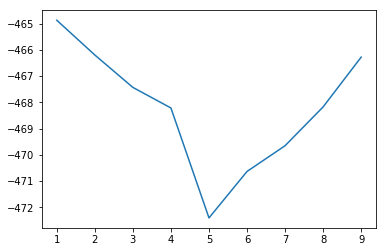

In [75]:
aic = []
arorder = range(1,10)
for i in arorder:
    model = sm.tsa.ARIMA(logcpi, order=(i,1,0))
    fit = model.fit(method="mle")
    aic.append(fit.aic)
plt.plot(arorder, aic)
    

Use the AIC statistic to select the Model. Looks like Order =5 is the best fit. look at the coefficients for order 5.

In [77]:
model = sm.tsa.ARIMA(logcpi, order=(5,1,0))
fit = model.fit(method="mle")
fit.summary()

C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.VALUE   No. Observations:                   74
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 243.200
Method:                           mle   S.D. of innovations              0.009
Date:                Wed, 24 Apr 2019   AIC                           -472.399
Time:                        16:39:47   BIC                           -456.271
Sample:                    07-01-1971   HQIC                          -465.965
                         - 10-01-1989                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0229      0.002     10.510      0.000       0.019       0.027
ar.L1.D.VALUE     0.1868      0.111      1.681      0.097      -0.031       0.405
ar.L2.D.VALUE     0.1817      0.109      1.672      0.099      -0.031       0.395
ar.L3.D.VALUE     0.2180      0.108      2.010      0.048       0.005       0.431
ar.L4.D.VALUE     0.2262      0.111      2.042      0.045       0.009       0.443
ar.L5.D.VALUE    -0.2858      0.112     -2.557      0.013      -0.505      -0.067
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2389           -0.0000j            1.2389           -0.5000
AR.2           -0.3080           -1.1851j            1.2244           -0.2905
AR.3           -0.3080           +1.1851j            1.2244            0.2905
AR.4            1.3232           -0.3645j            1.3725           -0.0428
AR.5            1.3232           +0.3645j            1.3725            0.0428
-----------------------------------------------------------------------------
"""

In [80]:
fit.arroots  #Check if Roots are outside unit circle
abs(fit.arroots )

array([1.23887013, 1.22444264, 1.22444264, 1.37253473, 1.37253473])

All roots are outside the Unit Circle and hence the AR model is stationaryu.
Now we use this model for prediction.

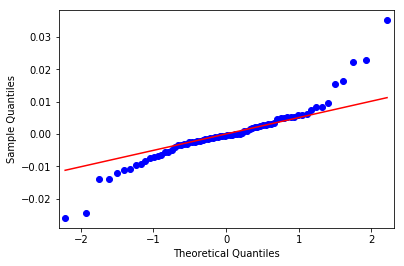

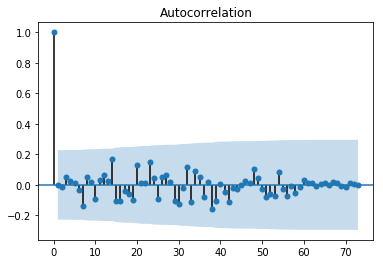

In [83]:
from statsmodels.graphics.api import qqplot
qqplot(fit.resid, line='q');
tsaplots.plot_acf(fit.resid);

C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


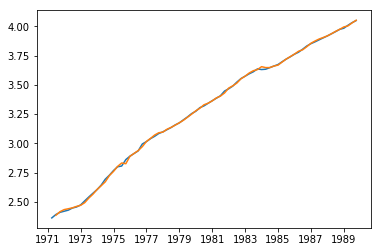

In [84]:
insample_predict=fit.predict(typ='levels')
plt.plot(logcpi)
plt.plot(insample_predict)

74 122


C:\Users\Akhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


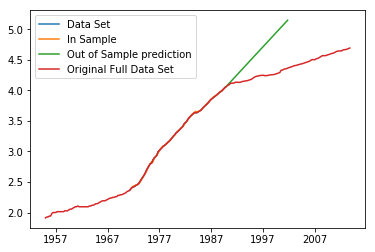

In [130]:
start=logcpi.index.get_loc(pd.to_datetime("1990-01-01"), method = 'nearest')
end = start + 48
print (start, end)
ospredict=fit.predict(start=start, end=end, typ='levels')
#print(logcpi)
#print(insample_predict)
#print(ospredict)
plt.plot(logcpi, label = 'Data Set')
plt.plot(insample_predict, label = 'In Sample')
plt.plot(ospredict, label = 'Out of Sample prediction')
df.set_index(df.DATE, inplace = True)
dftoplot = np.log(df.VALUE)
#print(dftoplot)
plt.plot(dftoplot, label = 'Original Full Data Set')

plt.legend()
plt.show()

Shows that we fit the Time Series to only a range of the data. There seems to be a break in the trend in 1991, that causes the out of sample prediction to diverge markedly from actual data. Would be interesting to run the TSA exercise by including more in - sample data or less in-sample data.